In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


updated file list


In [3]:
badsnms = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-11-06_123956_mmwtonestep.pkl')

In [17]:
snms = kid_readout.analysis.archive.load_noise_pkl('/data/readout/pkl/2015-11-06_225718_mmwtonestep.pkl')

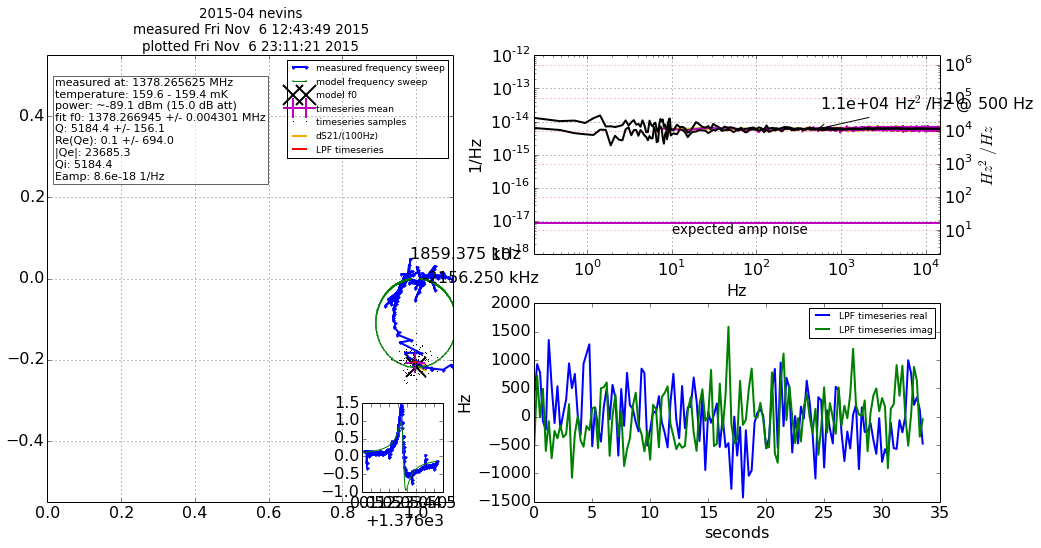

In [16]:
blah = badsnms[21+32*1].plot()

In [85]:
snm = snms[3+32]

In [86]:
s21c = snm.sweep_s21*np.exp(-2j*np.pi*32.705*snm.sweep_freqs_MHz)

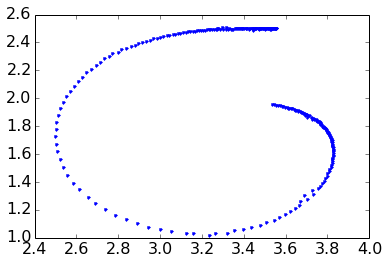

In [87]:
plot(s21c.real,s21c.imag,'.')

In [88]:
import kid_readout.analysis.resonator

In [89]:
res = kid_readout.analysis.resonator.fit_best_resonator(snm.sweep_freqs_MHz,np.conj(s21c),errors=snm.sweep_errors,min_a=1)

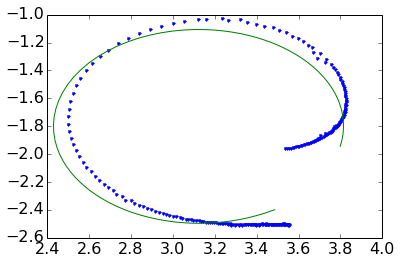

In [90]:
plot(s21c.real,-s21c.imag,'.')
plot(res.model().real,res.model().imag)

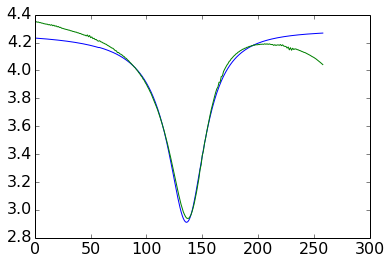

In [91]:
plot(np.abs(res.model()))
plot(np.abs(s21c))

In [92]:
res.f_0*1e3/(res.Q)

690.11714336567024

In [93]:
res.Q

1787.1766493893215

In [94]:
res.Q_i

2626.6736003150831

In [95]:
res.Q_e_real+1j*res.Q_e_imag

(5542.850990760684+521.07541794748977j)

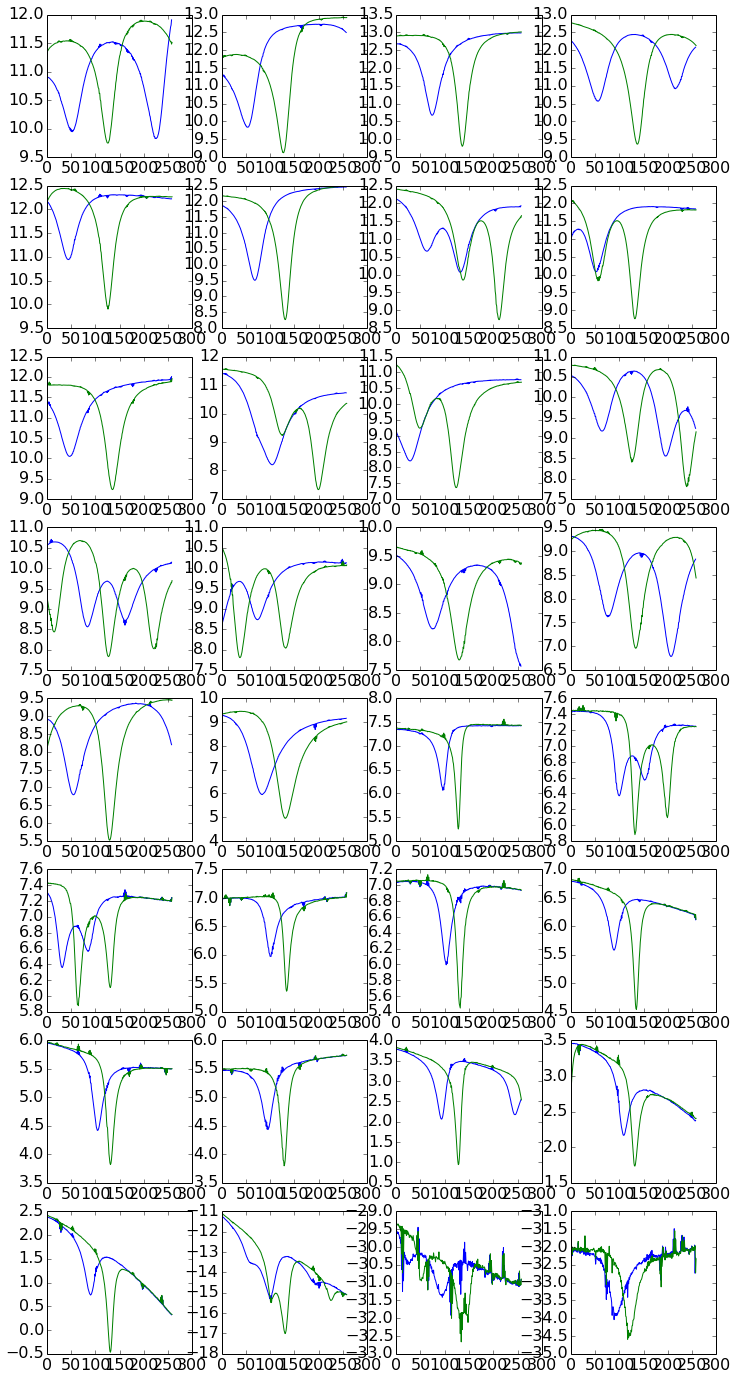

In [98]:
fig,axs = subplots(8,4,figsize=(12,24))
for k in range(32):
    ax = axs.flatten()[k]
    #snm = snms[k+32]
    ax.plot(20*np.log10(np.abs(snms[k].sweep_s21)))
    ax.plot(20*np.log10(np.abs(snms[k+32].sweep_s21)))
    

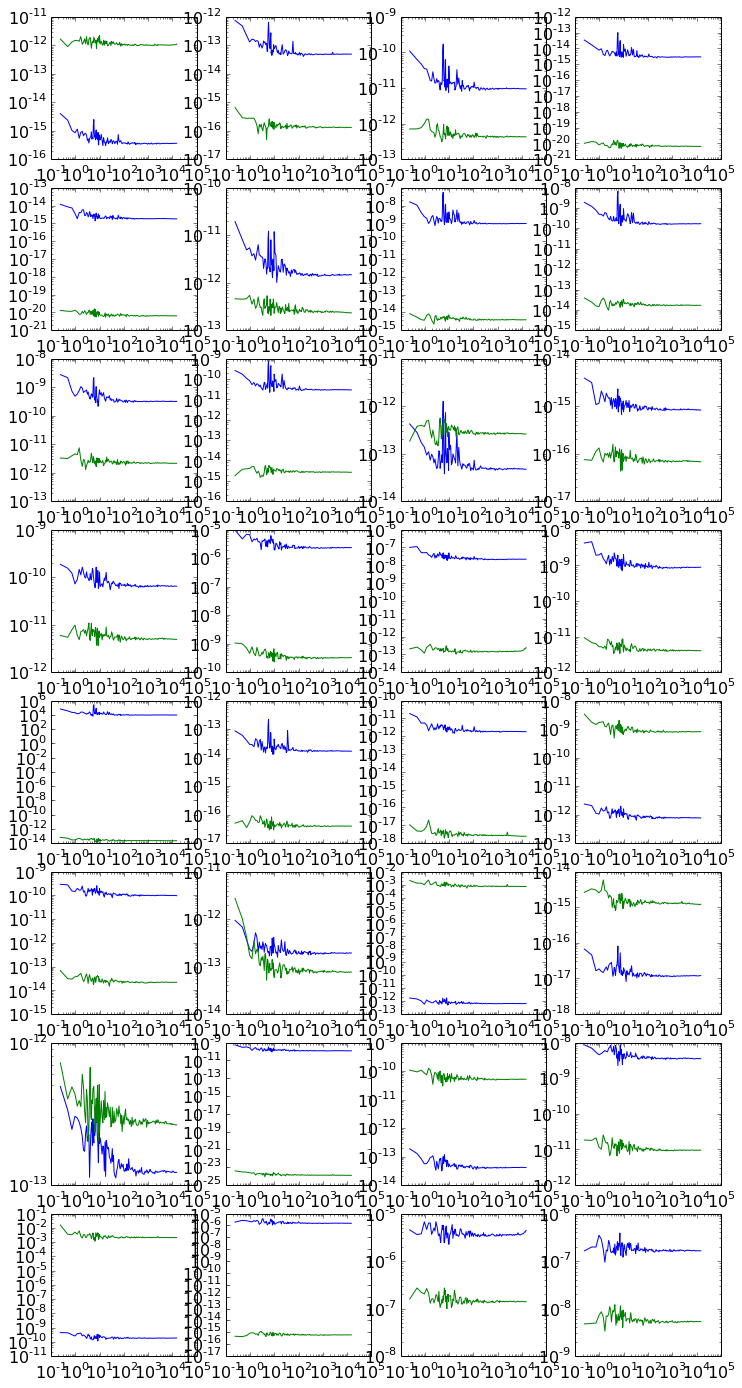

In [101]:
fig,axs = subplots(8,4,figsize=(12,24))
for k in range(32):
    ax = axs.flatten()[k]
    #snm = snms[k+32]
    ax.loglog(snms[k].pca_freq,snms[k].pca_eigvals[1,:])
    ax.loglog(snms[k].pca_freq,snms[k+32].pca_eigvals[1,:])
    